In [1]:
from models.DAX import DAX_quantile_regression, DAX_baseline
from functions import get_energy,get_DAX,merge_submissions,check_submission
from functions.prepare_data import split_time
from functions.evaluation import evaluate_horizon
from tqdm import tqdm
from functions import evaluate_energy_weekly
from models.energy.energy_models import energy_baseline,energy_LSTM, energy_XGBoost, energy_quantile_regression

In [2]:
# Load data
energydata= get_energy.get()

  0%|          | 0/274 [00:00<?, ?it/s]/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/functions/get_energy.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  energydata = pd.concat([energydata, pd.DataFrame(rawdata, columns=col_names)])
100%|██████████| 274/274 [00:34<00:00,  8.02it/s]


{'2024-01-01', '2021-12-26', '2023-05-18', '2024-12-26', '2021-05-24', '2022-10-03', '2022-12-25', '2021-01-01', '2024-05-01', '2021-05-13', '2024-05-20', '2023-10-03', '2022-05-01', '2024-05-09', '2021-10-03', '2022-04-18', '2023-12-25', '2024-04-01', '2023-12-26', '2021-05-01', '2023-05-01', '2023-01-01', '2024-12-25', '2022-04-15', '2023-04-10', '2022-05-26', '2021-04-02', '2023-05-29', '2024-03-29', '2022-12-26', '2021-12-25', '2021-04-05', '2022-01-01', '2024-10-03', '2023-04-07', '2022-06-06'}


In [3]:
baseline_model = {
    'name': 'Energy Baseline',
    'function': energy_baseline
}
XGB_model = {
    'name': 'Energy Extreme Gradient Boosting',
    'function': energy_XGBoost
}




/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:44: SettingWithCopyWarning: 
A value is trying 

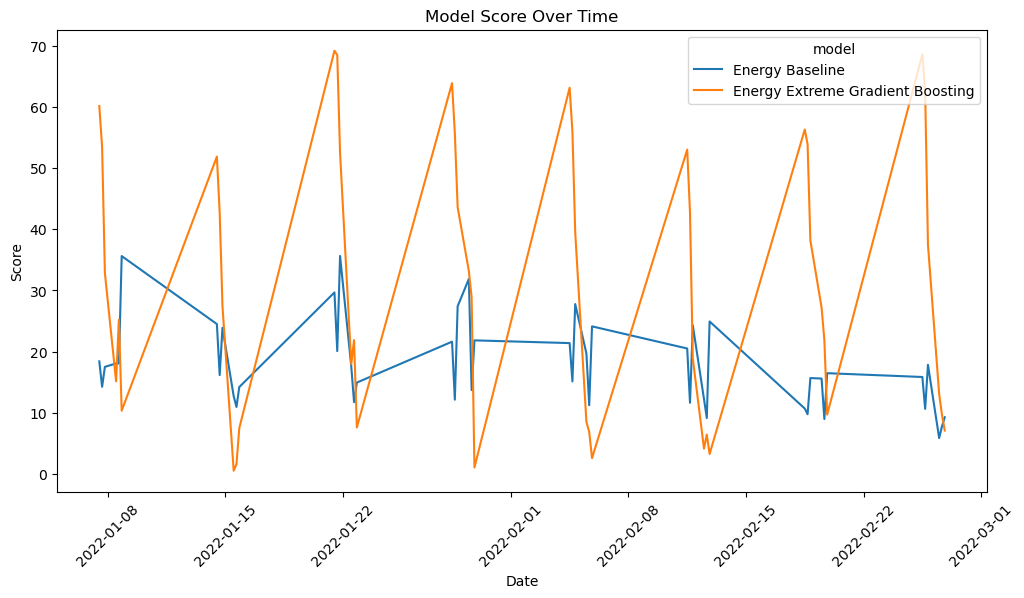

In [4]:
start_date = '2022-01-01'
end_date = '2022-02-28'


evaluation_model1, evaluation_model2, grouped_scores = evaluate_energy_weekly.evaluate(baseline_model, XGB_model, energydata, start_date, end_date, horizon_format="hours")

In [5]:
evaluation_model1

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975,actual_forecast_date,gesamt,weekday,score,model
0,2021-11-04,energy,36 hour,48.542912,62.620562,64.946125,69.024938,72.197031,2021-11-05 12:00:00+01:00,71.35650,4,15.458393,Energy Baseline
1,2021-11-04,energy,40 hour,51.211075,58.527188,61.818875,67.584313,73.321900,2021-11-05 16:00:00+01:00,68.53675,4,14.256854,Energy Baseline
2,2021-11-04,energy,44 hour,48.136700,52.844625,55.921125,60.129437,62.853625,2021-11-05 20:00:00+01:00,65.41475,4,29.564753,Energy Baseline
3,2021-11-04,energy,60 hour,49.873087,52.294562,54.351375,57.753062,62.173650,2021-11-06 12:00:00+01:00,59.80275,5,12.895028,Energy Baseline
4,2021-11-04,energy,64 hour,47.565687,50.608375,53.514125,58.631563,64.005444,2021-11-06 16:00:00+01:00,58.50475,5,9.824207,Energy Baseline
5,2021-11-04,energy,68 hour,44.750369,47.516250,50.120000,53.686813,57.423306,2021-11-06 20:00:00+01:00,58.50600,5,23.908691,Energy Baseline
0,2021-11-11,energy,36 hour,48.542912,62.620562,64.946125,69.024938,72.065737,2021-11-12 12:00:00+01:00,68.83525,4,8.267454,Energy Baseline
1,2021-11-11,energy,40 hour,51.211075,58.527188,61.818875,67.584313,72.491031,2021-11-12 16:00:00+01:00,67.55200,4,11.325685,Energy Baseline
2,2021-11-11,energy,44 hour,48.136700,52.844625,55.921125,60.129437,62.785962,2021-11-12 20:00:00+01:00,64.54975,4,25.371694,Energy Baseline
3,2021-11-11,energy,60 hour,49.873087,52.294562,54.351375,57.753062,62.173650,2021-11-13 12:00:00+01:00,61.15775,5,16.960028,Energy Baseline


In [6]:
evaluation_model2

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975,actual_forecast_date,gesamt,weekday,score,model
0,2021-11-04,energy,36 hour,55.431759,55.671131,56.210701,56.325253,59.220230,2021-11-05 12:00:00+01:00,71.35650,4,69.997318,Energy Extreme Gradient Boosting
1,2021-11-04,energy,40 hour,53.519360,53.792156,54.196312,54.984318,59.132114,2021-11-05 16:00:00+01:00,68.53675,4,61.131292,Energy Extreme Gradient Boosting
2,2021-11-04,energy,44 hour,50.866634,52.118721,52.855721,54.990791,56.640366,2021-11-05 20:00:00+01:00,65.41475,4,52.680437,Energy Extreme Gradient Boosting
3,2021-11-04,energy,60 hour,51.280010,51.517803,52.061394,54.389915,58.089092,2021-11-06 12:00:00+01:00,59.80275,5,23.770851,Energy Extreme Gradient Boosting
4,2021-11-04,energy,64 hour,49.583759,50.186989,50.250355,52.663689,56.427948,2021-11-06 16:00:00+01:00,58.50475,5,25.670681,Energy Extreme Gradient Boosting
5,2021-11-04,energy,68 hour,51.137253,51.171066,52.137348,53.468098,55.921379,2021-11-06 20:00:00+01:00,58.50600,5,23.001420,Energy Extreme Gradient Boosting
0,2021-11-11,energy,36 hour,56.068493,56.541664,57.374310,58.259151,62.357174,2021-11-12 12:00:00+01:00,68.83525,4,46.742467,Energy Extreme Gradient Boosting
1,2021-11-11,energy,40 hour,53.671570,54.186001,55.569653,56.233143,61.788197,2021-11-12 16:00:00+01:00,67.55200,4,47.577071,Energy Extreme Gradient Boosting
2,2021-11-11,energy,44 hour,54.093132,54.235268,54.247841,55.102951,58.798897,2021-11-12 20:00:00+01:00,64.54975,4,41.366343,Energy Extreme Gradient Boosting
3,2021-11-11,energy,60 hour,50.644417,52.404835,52.934624,53.395294,58.663799,2021-11-13 12:00:00+01:00,61.15775,5,29.632138,Energy Extreme Gradient Boosting


In [7]:
from functions import evaluate_energy

In [8]:
evaluation_regression, evaluation_XGBoost, grouped_scores=evaluate_energy.evaluate(Regression_model, XGB_model, df=energydata, start_date= start_date, end_date= end_date, horizon_format="hours")

NameError: name 'Regression_model' is not defined